## Esercizio 12.2

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Using TensorFlow backend.


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 4


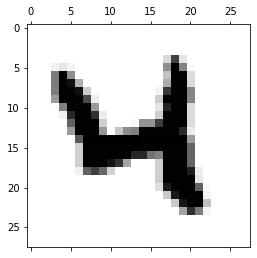

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [2]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [3]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Dense(10, activation='relu'))
    # apply MaxPooling2D
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    #apply Flatten
    model.add(Flatten())
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

In [5]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W0919 11:28:08.672690 4394747328 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0919 11:28:08.677551 4394747328 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0919 11:28:08.696879 4394747328 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0919 11:28:08.844043 4394747328 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0919 11:28:08.853049 4394747328 deprecation_wrapper.py:119] From //ana

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 57s 957us/step - loss: 0.7149 - acc: 0.7783 - val_loss: 0.2482 - val_acc: 0.9320
Epoch 2/5
60000/60000 [==============================] - 55s 914us/step - loss: 0.2943 - acc: 0.9115 - val_loss: 0.1625 - val_acc: 0.9534
Epoch 3/5
60000/60000 [==============================] - 57s 945us/step - loss: 0.2248 - acc: 0.9338 - val_loss: 0.1258 - val_acc: 0.9629
Epoch 4/5
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1910 - acc: 0.9424 - val_loss: 0.1078 - val_acc: 0.9684
Epoch 5/5
10000/10000 [==============================] - 3s 324us/step

Test loss: 0.0947250857308507
Test accuracy: 0.9715


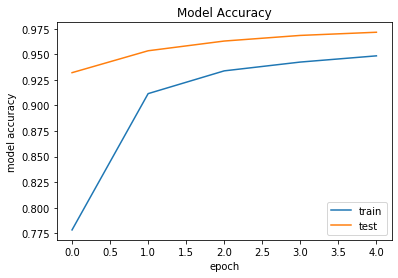

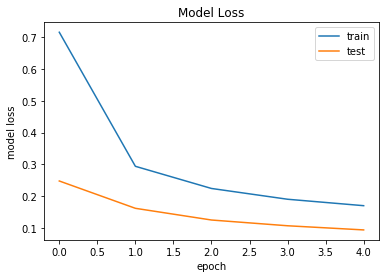

In [6]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.title("Model Accuracy")
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.title("Model Loss")
plt.show()

(10000, 28, 28, 1)


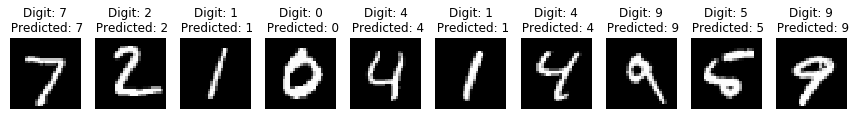

In [7]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print(X_test.shape)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\n Predicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Si osserva che l'utilizzo dei *convolutional layers* permette di ottenere dei risultati confrontabili come ordine di grandezza a quelli ottenuti nel caso del DNN con optimizer "*adam*" e "*adagrad*". 

E' possibile migliorare il modello in questione aumentando la complessità del sistema in termini di numero di layers a disposizione e neuroni disponibili per layer.

## Esercizio 12.3

Image size: 28x28
Data shape:  (28, 28)


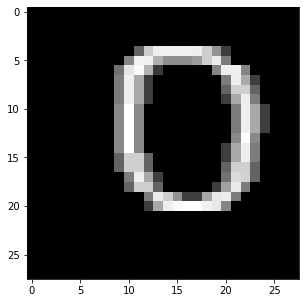

Digit predicted: 0


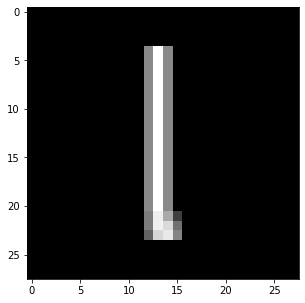

Digit predicted: 1


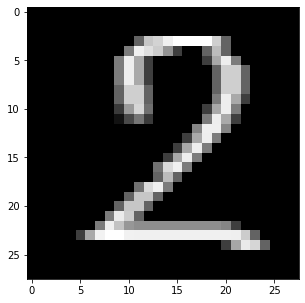

Digit predicted: 2


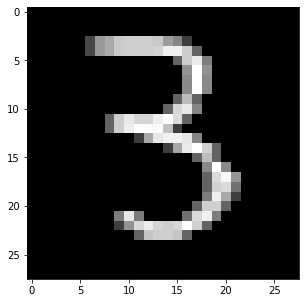

Digit predicted: 3


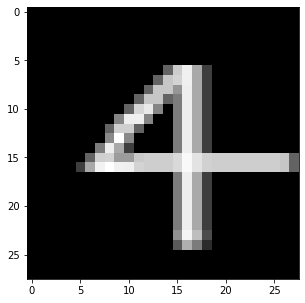

Digit predicted: 4


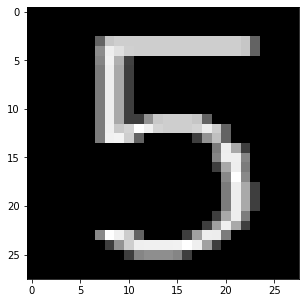

Digit predicted: 5


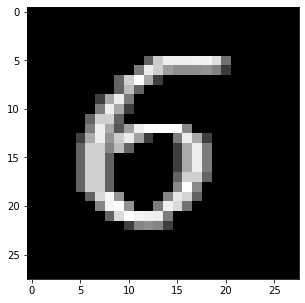

Digit predicted: 5


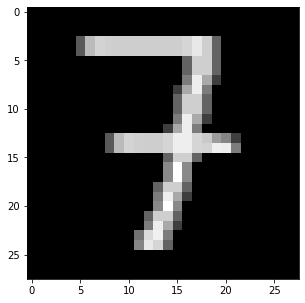

Digit predicted: 3


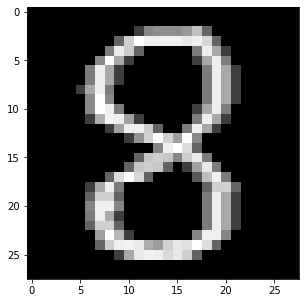

Digit predicted: 8


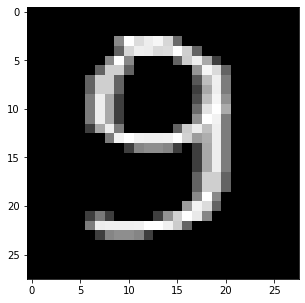

Digit predicted: 3


In [8]:
from PIL import Image
import os

pred=[]
v_data=np.array([])
for k in range(num_classes):
    digit_filename = "./Pictures/"+str(k)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    if(k==0):
        print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    if(k==0):
        print("Data shape: ",data.shape)
    plt.figure(figsize=(5,5))
    plt.imshow(data, cmap='gray')
    plt.show()

    data = data.reshape(xdim,ydim,1)
    #print(data.shape)
    v_data=np.array([data])
    pred_0 = model_CNN.predict(v_data)

    data = data.reshape(xdim,ydim)

    print("Digit predicted: {}".format(np.argmax(pred_0)))

Delle 10 cifre utilizzate 8/10 sono state predette correttamente, di conseguenza si può ritenere il modello CNN sviluppato sufficientemente efficiente.